# Modelos Matemáticos na Partilha

Os modelos matemáticos de partilha são utilizados para dividir recursos ou bens de forma justa entre várias partes. Pretendem garantir que cada parte recebe uma porção proporcional ao seu direito ou contribuição.

**Aplicações**

Esses modelos são aplicados em diversos contextos:

- **Eleições:** Para converter votos em mandatos de forma proporcional.
- **Alocação de Fundos:** Para distribuir recursos financeiros entre diferentes departamentos ou projetos.
- **Divisão de Bens:** Em contextos legais, como heranças ou dissoluções de sociedades.

No contexto das eleições legislativas, por exemplo, é fundamental garantir uma distribuição justa de lugares no parlamento, com base na poporção de votos recebidos por cada partido.

Definimos a **quota** de um partido, no contexto da distribuição de mandatos eleitorais, como sendo a *proporção teórica* de mandatos que esse partido recebe, se os lugares fossem distribuídos na exata proporção dos votos obtidos.

A quota é dada pelo produto entre a percentagem de votos obtidos pelo partido e o número total de mandatos a distribuir.

Considerando:

- $q$: quota do partido
- $p$: percentagem de votos obtidos pelo partido
- $m$: número total de mandatos a distribuir

podemos escrever $$q=\frac{p}{100}\times m$$

**OBSERVAÇÕES**

1. A *proporção teórica* refere-se a uma distribuição ideal de mandatos que seria exatamente proporcional aos votos recebidos por cada partido, sem considerar as limitações práticas dos sistemas eleitorais reais.
Por exemplo, se um partido recebesse 30% dos votos em uma eleição e existissem 100 mandatos a serem distribuídos, a *proporção teórica* de mandatos para esse partido seria exatamente 30 mandatos.

No entanto, na prática, os sistemas eleitorais geralmente não conseguem atingir essa proporção exata devido a vários fatores:

- O número de mandatos é geralmente um número inteiro, o que pode levar a arredondamentos.
- Muitos sistemas têm um limiar mínimo de votos para que um partido obtenha representação.
- Alguns métodos de distribuição de mandatos podem favorecer ligeiramente partidos maiores ou menores.

2. Em geral, a quota não é um número inteiro.

3. A quota representa então um número idealizado de mandatos que um partido receberia, numa distribuição perfeitamente proporcional, antes de qualquer arredondamento para distribuir um número inteiro de lugares.


**Princípios Fundamentais**

- **Princípio da Quota:** Garante que cada parte recebe uma quantidade de recursos dentro de um intervalo específico, baseado na sua proporção de votos ou direitos.

**Como Funciona:**

**Quota Inferior:** Cada parte deve receber pelo menos a parte inteira da sua quota.

**Quota Superior:** Nenhuma parte deve receber mais do que a parte inteira da sua quota mais um.

**Exemplo:** Se um partido tem direito a 2,4 mandatos, deve receber pelo menos 2 mandatos (quota inferior) e no máximo 3 mandatos (quota superior).
  
- **Princípio da Monotonia:** Garante que, se a quantidade total de recursos aumenta, nenhuma parte deve receber menos recursos do que antes. Do mesmo modo, se a quantidade total de recursos diminui, nenhuma parte deve receber mais recursos do que anteriormente.

**Como Funciona:**

**Monotonia Positiva:** Se o número total de recursos aumenta, a alocação de cada parte não deve diminuir.

**Monotonia Negativa:** Se o número total de recursos diminui, a alocação de cada parte não deve aumentar.

**Exemplo:** Se um partido inicialmente recebe 3 mandatos com 100 mandatos totais, e o número total de mandatos aumenta para 110, o partido não deve receber menos de 3 mandatos.

## Métodos de partilha proporcional

Os métodos de partilha proporcional são fundamentais para sistemas eleitorais que pretendem refletir com precisão a vontade do eleitorado na composição dos órgãos legislativos. 

Estes métodos visam distribuir os mandatos entre os partidos, ou coligações, de forma que a representação final seja o mais próxima possível da proporção de votos recebidos por cada um.

Existem diversos métodos de partilha proporcional, cada um com suas próprias características e impactos na distribuição final dos mandatos. Entre os mais conhecidos estão:

- Método D'Hondt: Amplamente utilizado, inclusive em Portugal, favorece ligeiramente os partidos maiores.
- Método de Sainte-Laguë: Usa divisores ímpares, tendendo a ser mais favorável a partidos menores.
- Método de Hare: Baseado numa quota calculada a partir do total de votos e mandatos disponíveis.
- Método de Hamilton: Utiliza o conceito de "resto maior" para distribuir os mandatos remanescentes.
- Método de Imperiali: Uma variação do D'Hondt que tende a favorecer ainda mais os partidos maiores.

A escolha do método pode influenciar significativamente o resultado final da eleição, especialmente em termos de representatividade dos partidos menores. Cada sistema político adota o método que considera mais adequado às suas realidades e objetivos democráticos.

## Sistemas de distribuição de mandatos

### Método de D'Hondt

O **método de D'Hondt** (<img src="Hondt.jpg" alt="Hondt" width="75" height="50">Victor Joseph Auguste D’Hondt (1841-1901), advogado e professor de Direito belga), é um sistema de representação proporcional usado para atribuir mandatos em assembleias legislativas. Este método visa garantir uma representação proporcional dos partidos de acordo com os votos recebidos. 

Portugal utiliza um sistema de representação proporcional para suas eleições legislativas. Mais especificamente, o país adota o método de Hondt para a distribuição de lugares no parlamento.

#### Passos do Método D'Hondt

1. Contabilização dos votos totais de cada partido.
2. Divisão dos votos de cada partido sucessivamente por 1, 2, 3, 4 e assim por diante, até o número total de mandatos a serem distribuídos.
3. Ordenação dos resultados dessas divisões (quocientes) do maior para o menor.
4. Atribuição dos mandatos aos partidos com os maiores quocientes, até que todos os lugares sejam preenchidos.

**EXEMPLO**

![Tabela de atribuição de mandatos](tabela_hondt.png){width="80%"}

*Atribuição de 8 mandatos por 3 partidos pelo método D'Hondt*

A tabela mostra a distribuição de 8 mandatos entre 3 partidos (A, B e C) usando o método D'Hondt.
Partido A: 10.000 votos
Partido B: 6.000 votos
Partido C: 1.500 votos

Temos então:

1. 1º mandato: Partido A (10.000 ÷ 1 = 10.000)
2. 2º mandato: Partido B (6.000 ÷ 1 = 6.000)
3. 3º mandato: Partido A (10.000 ÷ 2 = 5.000)
4. 4º mandato: Partido A (10.000 ÷ 3 = 3.333)
5. 5º mandato: Partido B (6.000 ÷ 2 = 3.000)
6. 6º mandato: Partido A (5.000)
7. 7º mandato: Partido B (6.000 ÷ 3 = 2.000)
8. 8º mandato: Partido A (10.000 ÷ 5 = 2.000)


**Resultado Final:**

| Partido | Mandatos |
|---------|----------|
| A       | 5        |
| B       | 3        |
| C       | 0        |


- O Partido C, com 1.500 votos, não conseguiu nenhum mandato pois os quocientes nunca superaram os dos outros partidos.
- Este método tende a favorecer partidos maiores. No exemplo, o Partido A, com menos que o dobro dos votos do Partido B, obteve mais que o dobro dos mandatos.
- O Partido C, mesmo com uma quantidade significativa de votos, não obteve representação.


### Método de Sainte-Laguë

O **método de Sainte-Laguë** (<img src="Lague.jpg" alt="Lague" width="75" height="50"> André Sainte-Laguë (1882-1950), matemático francês) é outra forma de distribuição proporcional de mandatos, que tende a favorecer partidos menores em comparação com o método de Hondt.



#### Passos do Método de Sainte-Laguë

1. Contabilização dos votos totais de cada partido.
2. Divisão dos votos de cada partido sucessivamente por 1, 3, 5, 7 e assim por diante (números ímpares), até o número total de mandatos a serem distribuídos.
3. Ordenação dos resultados dessas divisões (quocientes) do maior para o menor.
4. Atribuição dos mandatos aos partidos com os maiores quocientes, até que todos os lugares sejam preenchidos.


Vamos analisar a distribuição de 8 mandatos entre 3 partidos (A, B e C) usando o método de Sainte-Laguë, recorrendo aos valores da tabela anterior:


| Partido | Votos Recebidos |
|---------|-----------------|
| A       | 10.000          |
| B       | 6.000           |
| C       | 1.500           |


Distribuição pelo método de Sainte-Laguë

1. 1º mandato: Partido A (10.000 ÷ 1 = 10.000)
2. 2º mandato: Partido B (6.000 ÷ 1 = 6.000)
3. 3º mandato: Partido C (1.500 ÷ 1 = 1.500)
4. 4º mandato: Partido A (10.000 ÷ 3 ≈ 3.333)
5. 5º mandato: Partido B (6.000 ÷ 3 = 2.000)
6. 6º mandato: Partido A (10.000 ÷ 5 = 2.000)
7. 7º mandato: Partido B (6.000 ÷ 5 = 1.200)
8. 8º mandato: Partido A (10.000 ÷ 7 ≈ 1.429)

**Resultado Final:**

| Partido | Mandatos |
|---------|----------|
| A       | 4        |
| B       | 3        |
| C       | 1        |



- O Partido C, com 1.500 votos, conseguiu um mandato, diferentemente do que ocorreria no método D'Hondt.
- Este método tende a favorecer uma distribuição mais equilibrada entre partidos grandes e pequenos.
- A diferença na distribuição de mandatos entre os partidos A e B é menor comparando com o método D'Hondt.


O método de Sainte-Laguë é considerado mais proporcional que o D'Hondt, oferecendo melhor representação para partidos menores. No entanto, pode levar a uma maior fragmentação partidária nos órgãos legislativos. A escolha entre os métodos muitas vezes reflete o equilíbrio desejado entre representatividade e governabilidade no sistema político de cada país.

**Exercício**

Numa eleição legislativa, quatro partidos políticos concorreram para preencher 10 mandatos na assembleia. Os resultados da votação foram os seguintes:

Partido A: 100.000 votos
Partido B: 80.000 votos
Partido C: 30.000 votos
Partido D: 20.000 votos

Total de votos: 230.000
Número de mandatos a serem distribuídos: 10

Tarefa: Utilize os métodos de Hondt e Sainte-Laguë para distribuir os mandatos entre os partidos com base nestes resultados eleitorais. Compare os resultados obtidos por cada método.

In [5]:
def metodo_hondt(votos, mandatos):
    partidos = list(votos.keys())
    distribuicao = {partido: 0 for partido in partidos}
    
    for _ in range(mandatos):
        quocientes = {partido: votos[partido] / (distribuicao[partido] + 1) for partido in partidos}
        vencedor = max(quocientes, key=quocientes.get)
        distribuicao[vencedor] += 1
    
    return distribuicao

votos = {'Partido A': 100000, 'Partido B': 80000, 'Partido C': 30000, 'Partido D': 20000}
mandatos = 10
resultado = metodo_hondt(votos, mandatos)
print("Distribuição de mandatos pelo método de Hondt:")
for partido, num_mandatos in resultado.items():
    print(f"{partido}: {num_mandatos} mandatos")

Distribuição de mandatos pelo método de Hondt:
Partido A: 5 mandatos
Partido B: 4 mandatos
Partido C: 1 mandatos
Partido D: 0 mandatos


In [6]:
def metodo_sainte_lague(votos, mandatos):
    partidos = list(votos.keys())
    distribuicao = {partido: 0 for partido in partidos}
    
    for _ in range(mandatos):
        quocientes = {partido: votos[partido] / (2 * distribuicao[partido] + 1) for partido in partidos}
        vencedor = max(quocientes, key=quocientes.get)
        distribuicao[vencedor] += 1
    
    return distribuicao

# Exemplo

votos = {'Partido A': 100000, 'Partido B': 80000, 'Partido C': 30000, 'Partido D': 20000}
mandatos = 10
resultado = metodo_sainte_lague(votos, mandatos)
print("\nDistribuição de mandatos pelo método de Sainte-Laguë:")
for partido, num_mandatos in resultado.items():
    print(f"{partido}: {num_mandatos} mandatos")


Distribuição de mandatos pelo método de Sainte-Laguë:
Partido A: 4 mandatos
Partido B: 4 mandatos
Partido C: 1 mandatos
Partido D: 1 mandatos


### Visualização da comparação entre os dois métodos

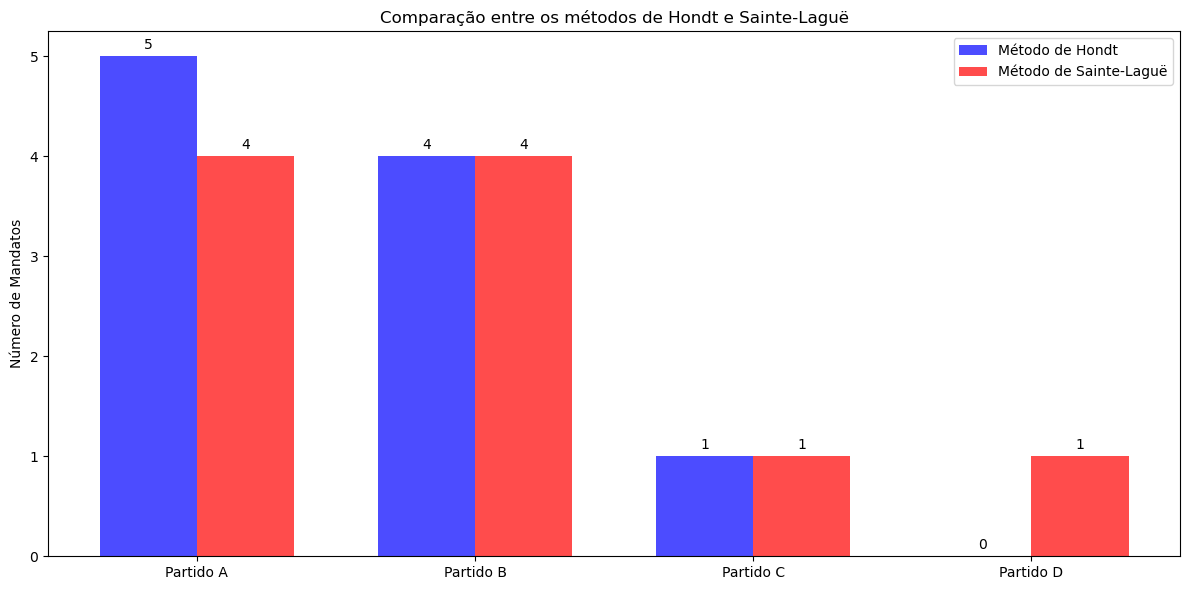

Distribuição de mandatos pelo método de Hondt:
Partido A: 5 mandatos
Partido B: 4 mandatos
Partido C: 1 mandatos
Partido D: 0 mandatos

Distribuição de mandatos pelo método de Sainte-Laguë:
Partido A: 4 mandatos
Partido B: 4 mandatos
Partido C: 1 mandatos
Partido D: 1 mandatos


In [8]:
import matplotlib.pyplot as plt

def metodo_hondt(votos, mandatos):
    partidos = list(votos.keys())
    distribuicao = {partido: 0 for partido in partidos}
    
    for _ in range(mandatos):
        quocientes = {partido: votos[partido] / (distribuicao[partido] + 1) for partido in partidos}
        vencedor = max(quocientes, key=quocientes.get)
        distribuicao[vencedor] += 1
    
    return distribuicao

def metodo_sainte_lague(votos, mandatos):
    partidos = list(votos.keys())
    distribuicao = {partido: 0 for partido in partidos}
    
    for _ in range(mandatos):
        quocientes = {partido: votos[partido] / (2 * distribuicao[partido] + 1) for partido in partidos}
        vencedor = max(quocientes, key=quocientes.get)
        distribuicao[vencedor] += 1
    
    return distribuicao

def comparar_metodos(votos, mandatos):
    resultado_hondt = metodo_hondt(votos, mandatos)
    resultado_sainte_lague = metodo_sainte_lague(votos, mandatos)
    partidos = list(votos.keys())
    lugares_hondt = [resultado_hondt[partido] for partido in partidos]
    lugares_sainte_lague = [resultado_sainte_lague[partido] for partido in partidos]
    
    x = range(len(partidos))
    width = 0.35
    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar([i - width/2 for i in x], lugares_hondt, width, label='Método de Hondt', color='blue', alpha=0.7)
    rects2 = ax.bar([i + width/2 for i in x], lugares_sainte_lague, width, label='Método de Sainte-Laguë', color='red', alpha=0.7)
    
    ax.set_ylabel('Número de Mandatos')
    ax.set_title('Comparação entre os métodos de Hondt e Sainte-Laguë')
    ax.set_xticks(x)
    ax.set_xticklabels(partidos)
    ax.legend()
    
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    
    fig.tight_layout()
    plt.show()
    
    print("Distribuição de mandatos pelo método de Hondt:")
    for partido, num_mandatos in resultado_hondt.items():
        print(f"{partido}: {num_mandatos} mandatos")
    
    print("\nDistribuição de mandatos pelo método de Sainte-Laguë:")
    for partido, num_mandatos in resultado_sainte_lague.items():
        print(f"{partido}: {num_mandatos} mandatos")

# Exemplo de uso
votos = {'Partido A': 100000, 'Partido B': 80000, 'Partido C': 30000, 'Partido D': 20000}
mandatos = 10
comparar_metodos(votos, mandatos)

A diferença entre os métodos de Sainte-Laguë e D'Hondt pode ser explicada matematicamente através das fórmulas que cada método utiliza para distribuir os mandatos.

**Fórmulas básicas:**

*Método D'Hondt:*  $\frac{V}{m}$

*Método Sainte-Laguë:* $\frac{V}{2m + 1}$

Onde $V$ é o número total de votos recebidos por um partido e $m\in\mathbb{N}$ é o número de mandatos já atribuídos a esse partido.

Sequência de divisores:

D'Hondt: $1, 2, 3, 4, 5,\ldots$     Sainte-Laguë: $1, 3, 5, 7, 9,\ldots$

A principal diferença matemática entre os dois métodos está nos divisores utilizados. O método D'Hondt usa divisores consecutivos $m$, enquanto o método Sainte-Laguë usa números ímpares $(2m + 1)$.
Esta diferença faz com que o método Sainte-Laguë tenda a favorecer ligeiramente mais os partidos menores em comparação com o método D'Hondt, que tende a favorecer partidos maiores.

<div class="blue-background-dark-blue-text">

<div id="quiz-container">
    <h4>Exercício</h4>
    <div id="question">
        Um parlamento tem 8 lugares para distribuir. Os votos foram:<br>
        - Partido P: 100,000 votos<br>
        - Partido Q: 80,000 votos<br>
        - Partido R: 40,000 votos<br>
        - Partido S: 20,000 votos<br>
        Quantos lugares recebe o Partido Q pelo método de D'Hondt?
    </div>
    <input type="number" id="answer-input" min="0" max="8">
    <button onclick="checkAnswer()">Verificar</button>
    <div id="feedback"></div>
    <div id="attempts">Tentativas restantes: <span id="attempts-count">2</span></div>
</div>

<script>
let attempts = 2;
const correctAnswer = 3;

function checkAnswer() {
    const userAnswer = parseInt(document.getElementById('answer-input').value);
    const feedback = document.getElementById('feedback');
    const attemptsCount = document.getElementById('attempts-count');
    
    if (isNaN(userAnswer)) {
        feedback.textContent = "Por favor, insira um número válido.";
        feedback.style.color = 'red';
        return;
    }

    attempts--;
    attemptsCount.textContent = attempts;

    if (userAnswer === correctAnswer) {
        feedback.textContent = "Correto! O Partido Q recebe 3 lugares pelo método de D'Hondt.";
        feedback.style.color = 'green';
        endQuiz();
    } else {
        if (attempts > 0) {
            feedback.textContent = "Incorreto. Tente calcular novamente usando o método de D'Hondt.";
            feedback.style.color = 'red';
        } else {
            feedback.textContent = `Incorreto. A resposta correta é ${correctAnswer}. O Partido Q recebe ${correctAnswer} lugares pelo método de D'Hondt.`;
            feedback.style.color = 'red';
            endQuiz();
        }
    }
}

function endQuiz() {
    document.querySelector('button').style.display = 'none';
    document.getElementById('answer-input').disabled = true;
}
</script>

<style>
#quiz-container {
    background-color: #ffffff;
    max-width: 600px;
    margin: 20px auto;
    padding: 20px;
    border: 1px solid #ccc;
    border-radius: 5px;
    box-shadow: 0 0 10px rgba(0,0,0,0.1);
}
h2 {
    color: #00008b;
}
#question {
    margin-bottom: 20px;
}
input[type="number"] {
    width: 50px;
    margin-right: 10px;
    padding: 5px;
}
button {
    padding: 5px 10px;
    margin-right: 10px;
    background-color: #4169e1;
    color: white;
    border: none;
    border-radius: 3px;
    cursor: pointer;
}
button:hover {
    background-color: #1e90ff;
}
#feedback {
    margin-top: 20px;
    font-weight: bold;
}
</style>

</div>